In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import networkx as nx
import time
from math import sqrt
import random
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Load dataset
df_data = pd.read_csv("/content/Updated_Speed_Limits_with_Duration.csv")

In [ ]:
df_data

,start_node,end_node,paths,speed_limit_kph,distance_meters,duration_seconds,route,is_signed,is_blocked
0,"(40.817387, -73.925413)","(40.817501, -73.925585)",unnamed roads,25,20.1168,2.896819,ambulance entrance,emergency,0
1,"(40.817501, -73.925585)","(40.817980, -73.925216)",park avenue,30,60.9600,7.315200,street,oneway,0
2,"(40.817980, -73.925216)","(40.819259, -73.924069)",park avenue,30,160.9340,19.312080,street,oneway,0
3,"(40.819259, -73.924069)","(40.820560, -73.922594)",park avenue,30,160.9340,19.312080,street,oneway,0
4,"(40.820560, -73.922594)","(40.821551, -73.921220)",park avenue,30,160.9340,19.312080,street,oneway,0
...,...,...,...,...,...,...,...,...,...
111,"(40.822956, -73.914515)","(40.823472, -73.916221)",159th street,30,160.9340,19.312080,street,oneway,0
112,"(40.823595, -73.914186)","(40.824102, -73.915880)",160th street,30,160.9340,19.312080,street,oneway,0
113,"(40.824702, -73.915523)","(40.824207, -73.913844)",161st street,40,160.9340,14.484060,widestreet,twoway,0
114,"(40.824819, -73.913519)","(40.825219, -73.914749)",162nd street,30,113.0810,13.569720,street,oneway,0


In [ ]:
# Drop unnecesarry columsn
df = df_data.drop(columns=['paths', 'route'])

In [ ]:
df

,start_node,end_node,speed_limit_kph,distance_meters,duration_seconds,is_signed,is_blocked
0,"(40.817387, -73.925413)","(40.817501, -73.925585)",25,20.1168,2.896819,emergency,0
1,"(40.817501, -73.925585)","(40.817980, -73.925216)",30,60.9600,7.315200,oneway,0
2,"(40.817980, -73.925216)","(40.819259, -73.924069)",30,160.9340,19.312080,oneway,0
3,"(40.819259, -73.924069)","(40.820560, -73.922594)",30,160.9340,19.312080,oneway,0
4,"(40.820560, -73.922594)","(40.821551, -73.921220)",30,160.9340,19.312080,oneway,0
...,...,...,...,...,...,...,...
111,"(40.822956, -73.914515)","(40.823472, -73.916221)",30,160.9340,19.312080,oneway,0
112,"(40.823595, -73.914186)","(40.824102, -73.915880)",30,160.9340,19.312080,oneway,0
113,"(40.824702, -73.915523)","(40.824207, -73.913844)",40,160.9340,14.484060,twoway,0
114,"(40.824819, -73.913519)","(40.825219, -73.914749)",30,113.0810,13.569720,oneway,0


/tmp/ipython-input-4237917509.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='speed_limit_kph', palette='viridis')


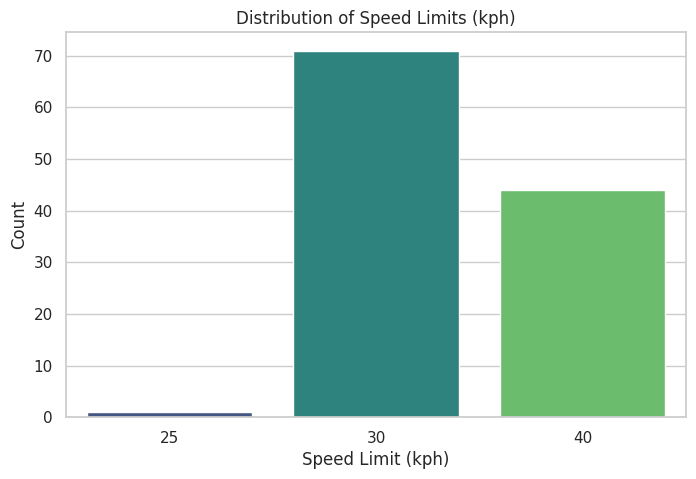

In [ ]:
# Data Visualization
# Set style for plots
sns.set_theme(style="whitegrid")

# Speed Limit Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='speed_limit_kph', palette='viridis')
plt.title('Distribution of Speed Limits (kph)')
plt.xlabel('Speed Limit (kph)')
plt.ylabel('Count')
plt.show()

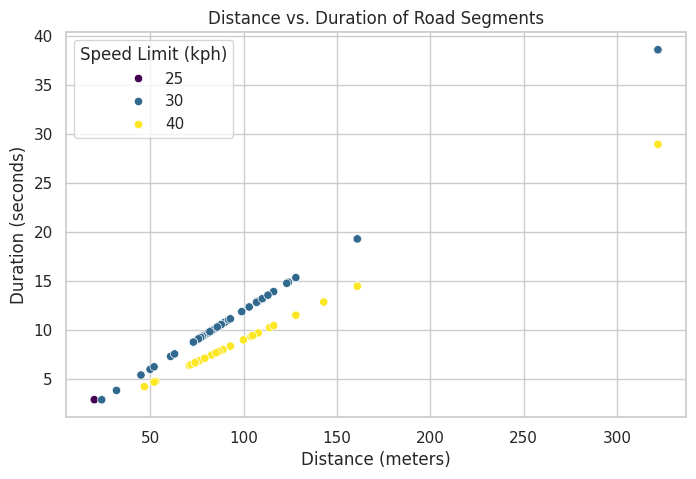

In [ ]:
# Distance vs. Duration
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='distance_meters', y='duration_seconds', hue='speed_limit_kph', palette='viridis')
plt.title('Distance vs. Duration of Road Segments')
plt.xlabel('Distance (meters)')
plt.ylabel('Duration (seconds)')
plt.legend(title='Speed Limit (kph)')
plt.show()

/tmp/ipython-input-2686387924.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_signed', palette='viridis')


Text(0, 0.5, 'Count')

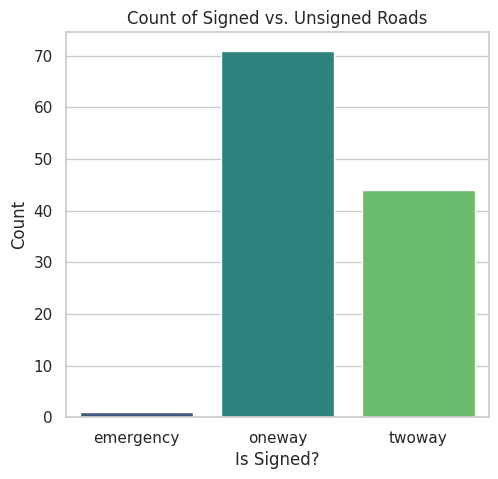

In [ ]:
# Road Type Analysis (is_signed and is_blocked)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='is_signed', palette='viridis')
plt.title('Count of Signed vs. Unsigned Roads')
plt.xlabel('Is Signed?')
plt.ylabel('Count')

/tmp/ipython-input-3166851106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_blocked', palette='viridis')


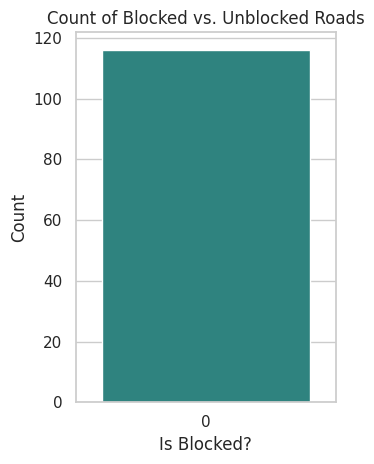

In [ ]:
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='is_blocked', palette='viridis')
plt.title('Count of Blocked vs. Unblocked Roads')
plt.xlabel('Is Blocked?')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

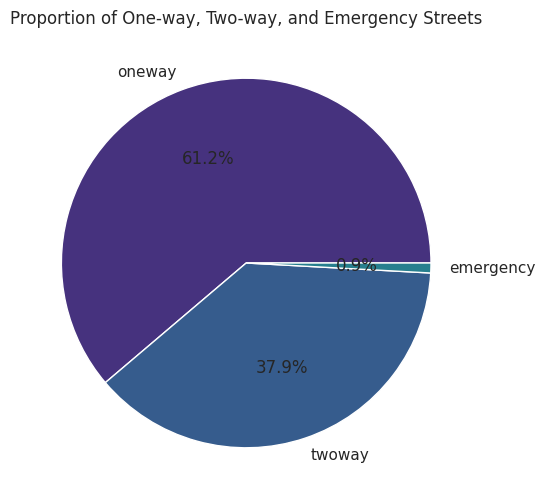

In [ ]:
street_types = df['is_signed'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(street_types, labels=['oneway', 'twoway', 'emergency'], autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Proportion of One-way, Two-way, and Emergency Streets')
plt.show()

Split successful!
Training samples: 81
Test samples: 35

Random Forest Regressor Metrics:
Mean Absolute Error: 1.1198
Mean Squared Error: 2.7165
Root Mean Squared Error: 1.6482
R-squared: 0.9697

Feature Importance:
           Feature  Importance
1  distance_meters    0.948158
0  speed_limit_kph    0.013013
2        is_signed    0.010878
3            route    0.009113
7          end_lat    0.008536
5        start_lat    0.004839
6        start_lon    0.002735
8          end_lon    0.002727
4       is_blocked    0.000000


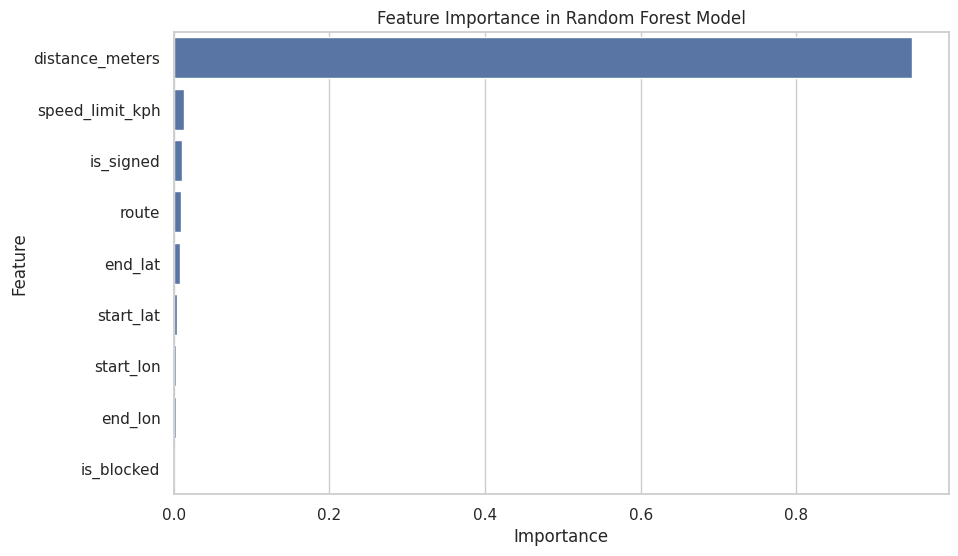

In [ ]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Prepare the data for modeling
# Convert categorical variables to numerical ones
df['is_signed'] = df['is_signed'].map({'emergency': 0, 'oneway': 1, 'twoway': 2})
df['route'] = df_data['route'].map({'ambulance entrance': 0, 'street': 1, 'widestreet': 2, 'boulevard': 3})

# Extract latitude and longitude from start_node and end_node
def extract_coords(coord_str):
    lat, lon = coord_str.strip('()').split(',')
    return float(lat), float(lon)

df['start_lat'], df['start_lon'] = zip(*df['start_node'].apply(extract_coords))
df['end_lat'], df['end_lon'] = zip(*df['end_node'].apply(extract_coords))

# Features and target
X = df[['speed_limit_kph', 'distance_meters', 'is_signed', 'route', 'is_blocked', 'start_lat', 'start_lon', 'end_lat', 'end_lon']]
y = df['duration_seconds']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Split successful!")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Metrics:")
print(f"Mean Absolute Error: {mae_rf:.4f}")
print(f"Mean Squared Error: {mse_rf:.4f}")
print(f"Root Mean Squared Error: {rmse_rf:.4f}")
print(f"R-squared: {r2_rf:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Random Forest Model')
plt.show()

In [ ]:
df

,start_node,end_node,speed_limit_kph,distance_meters,duration_seconds,is_signed,is_blocked,route,start_lat,start_lon,end_lat,end_lon
0,"(40.817387, -73.925413)","(40.817501, -73.925585)",25,20.1168,2.896819,0,0,0,40.817387,-73.925413,40.817501,-73.925585
1,"(40.817501, -73.925585)","(40.817980, -73.925216)",30,60.9600,7.315200,1,0,1,40.817501,-73.925585,40.817980,-73.925216
2,"(40.817980, -73.925216)","(40.819259, -73.924069)",30,160.9340,19.312080,1,0,1,40.817980,-73.925216,40.819259,-73.924069
3,"(40.819259, -73.924069)","(40.820560, -73.922594)",30,160.9340,19.312080,1,0,1,40.819259,-73.924069,40.820560,-73.922594
4,"(40.820560, -73.922594)","(40.821551, -73.921220)",30,160.9340,19.312080,1,0,1,40.820560,-73.922594,40.821551,-73.921220
...,...,...,...,...,...,...,...,...,...,...,...,...
111,"(40.822956, -73.914515)","(40.823472, -73.916221)",30,160.9340,19.312080,1,0,1,40.822956,-73.914515,40.823472,-73.916221
112,"(40.823595, -73.914186)","(40.824102, -73.915880)",30,160.9340,19.312080,1,0,1,40.823595,-73.914186,40.824102,-73.915880
113,"(40.824702, -73.915523)","(40.824207, -73.913844)",40,160.9340,14.484060,2,0,2,40.824702,-73.915523,40.824207,-73.913844
114,"(40.824819, -73.913519)","(40.825219, -73.914749)",30,113.0810,13.569720,1,0,1,40.824819,-73.913519,40.825219,-73.914749


Running Dijkstra with predicted costs...
Running A* with predicted costs...
Running Greedy BFS with predicted costs...
Running Ant Colony Optimization with predicted costs...


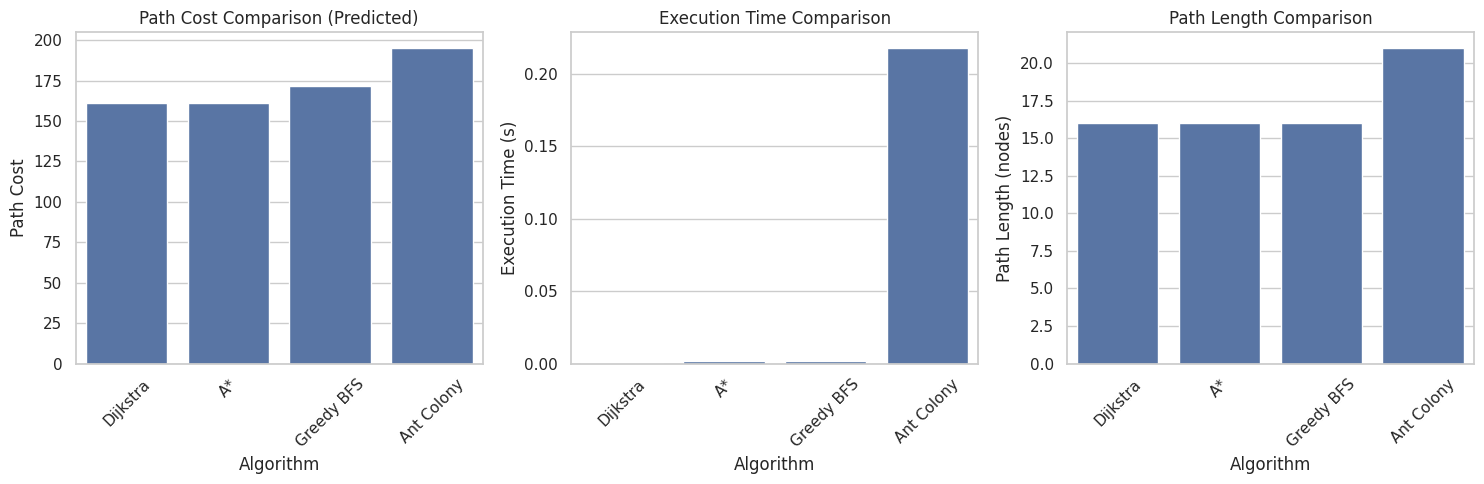


Performance Metrics with Predicted Costs:
    Algorithm   Path Cost  Execution Time (s)  Path Length (nodes)
0    Dijkstra  160.877071            0.000508                   16
1          A*  160.877071            0.001756                   16
2  Greedy BFS  171.698952            0.001549                   16
3  Ant Colony  195.128834            0.217700                   21

Visualizing paths with predicted costs...


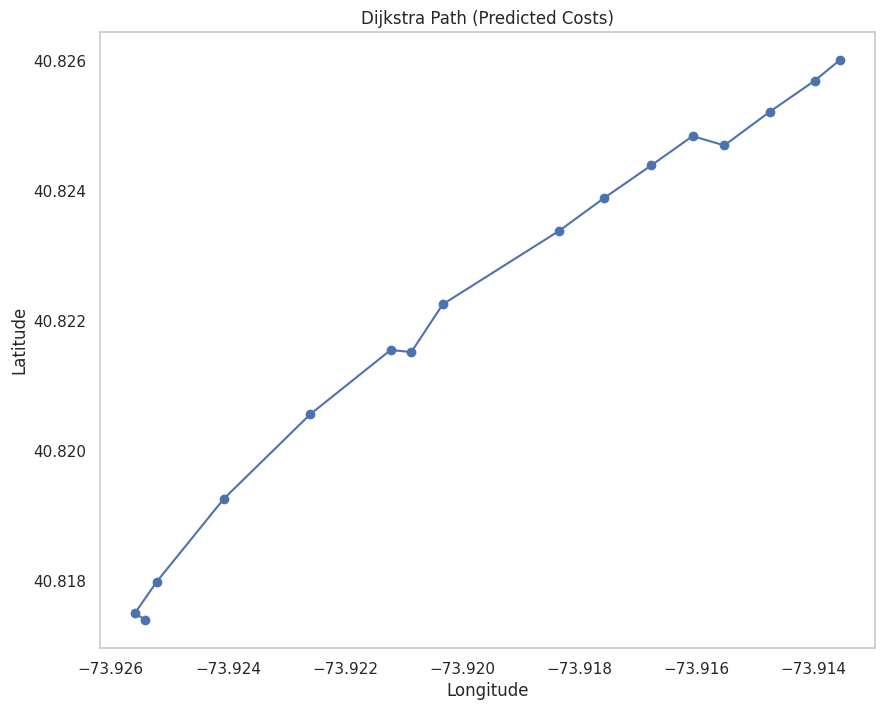

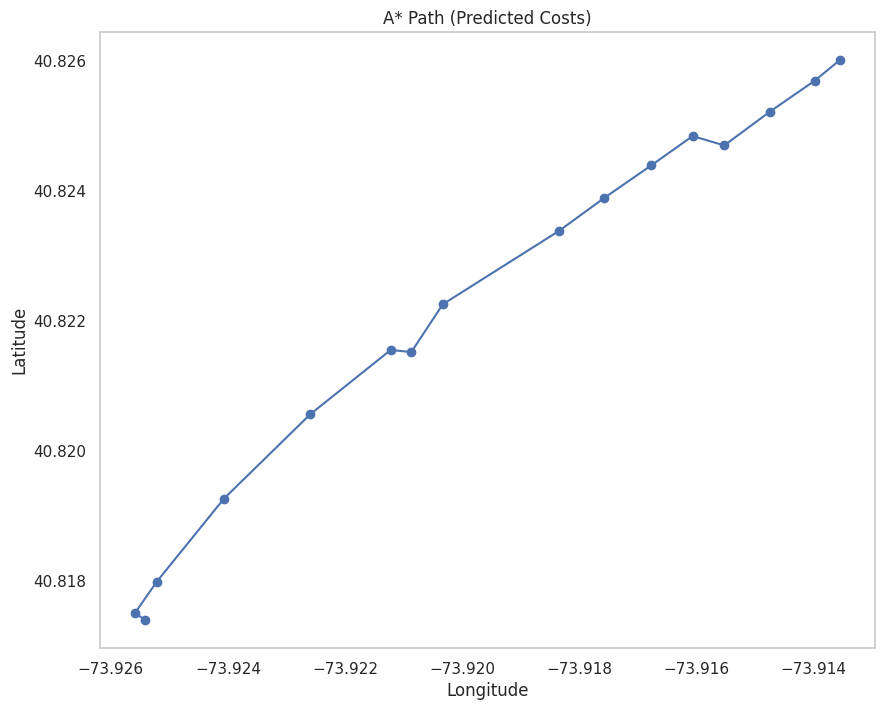

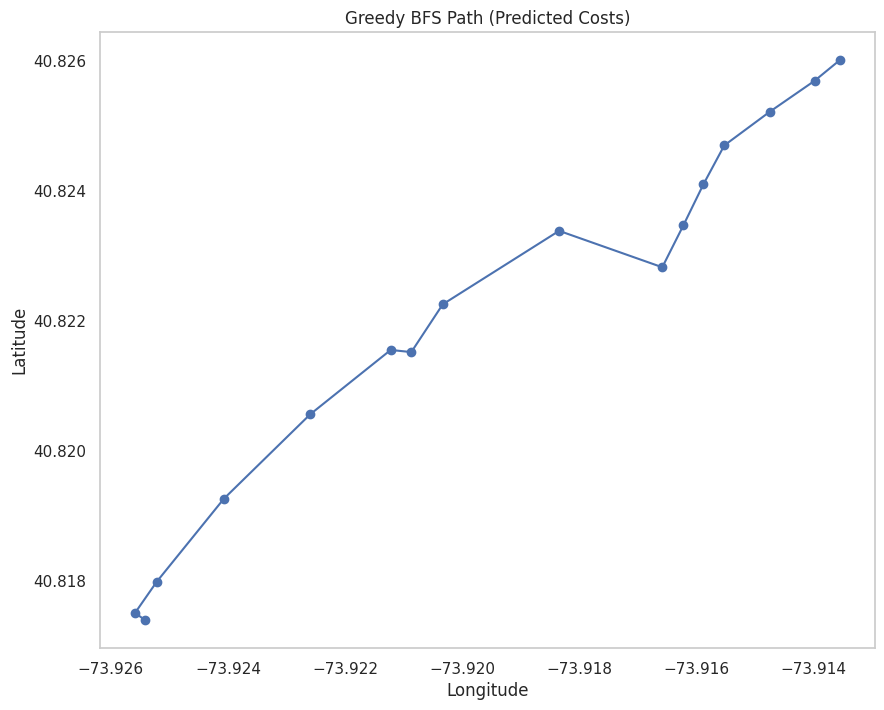

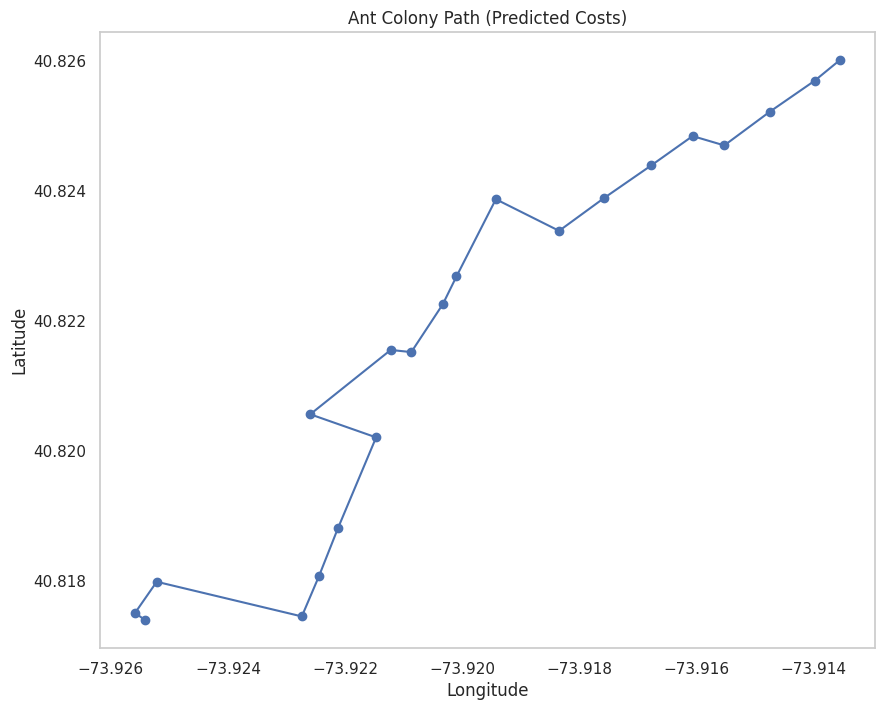

In [ ]:
# First, let's add the cost column based on our Random Forest predictions
df['cost'] = rf_model.predict(X)

# Now create the graph with the predicted costs
G = nx.DiGraph() if 'oneway' in df.columns else nx.Graph()

for _, row in df.iterrows():
    G.add_edge(
        row['start_node'],
        row['end_node'],
        weight=row['cost'],  # Using our predicted cost
        distance=row['distance_meters'],
        duration=row['duration_seconds'],
        is_blocked=row['is_blocked']
    )

# Heuristic function remains the same
def heuristic(u, v):
    u_coords = eval(u)
    v_coords = eval(v)
    return sqrt((u_coords[0]-v_coords[0])**2 + (u_coords[1]-v_coords[1])**2)

# Optimized Dijkstra's algorithm using priority queue
def run_dijkstra(G, start, end):
    start_time = time.time()

    # Using Fibonacci heap implementation for better performance
    try:
        path = nx.shortest_path(G, source=start, target=end, weight='weight', method='dijkstra')
        total_cost = nx.shortest_path_length(G, source=start, target=end, weight='weight', method='dijkstra')
    except nx.NetworkXNoPath:
        return None, float('inf'), time.time() - start_time

    exec_time = time.time() - start_time
    return path, total_cost, exec_time

# Optimized A* algorithm with pre-processing and caching
class AStarOptimizer:
    def __init__(self, G, heuristic):
        self.G = G
        self.heuristic = heuristic
        self.heuristic_cache = {}

    def find_path(self, start, end):
        start_time = time.time()

        # Check if start or end nodes exist in the graph
        if start not in self.G or end not in self.G:
            return None, float('inf'), time.time() - start_time

        # Check if start and end are the same
        if start == end:
            return [start], 0, time.time() - start_time

        # Precompute heuristic values for all nodes to the end node
        if end not in self.heuristic_cache:
            self.heuristic_cache[end] = {node: self.heuristic(node, end) for node in self.G.nodes()}

        try:
            path = nx.astar_path(self.G, source=start, target=end,
                                heuristic=lambda u, v: self.heuristic_cache[end][u],
                                weight='weight')
            total_cost = sum(self.G[u][v]['weight'] for u, v in zip(path[:-1], path[1:]))
        except nx.NetworkXNoPath:
            return None, float('inf'), time.time() - start_time

        exec_time = time.time() - start_time
        return path, total_cost, exec_time

# Optimized Greedy BFS with early termination and caching
class GreedyBFSOptimizer:
    def __init__(self, G, heuristic):
        self.G = G
        self.heuristic = heuristic
        self.heuristic_cache = {}

    def find_path(self, start, end):
        start_time = time.time()

        if start not in self.G or end not in self.G:
            return None, float('inf'), time.time() - start_time

        if start == end:
            return [start], 0, time.time() - start_time

        # Precompute heuristic values for all nodes to the end node
        if end not in self.heuristic_cache:
            self.heuristic_cache[end] = {node: self.heuristic(node, end) for node in self.G.nodes()}

        # Implement greedy BFS directly for better control
        path = [start]
        current = start
        visited = set([start])
        total_cost = 0

        while current != end:
            neighbors = list(self.G.neighbors(current))
            if not neighbors:
                return None, float('inf'), time.time() - start_time

            # Find neighbor with smallest heuristic value
            next_node = min(neighbors, key=lambda x: self.heuristic_cache[end][x])

            if next_node in visited:
                return None, float('inf'), time.time() - start_time

            # Add to path and update cost
            path.append(next_node)
            total_cost += self.G[current][next_node]['weight']
            visited.add(next_node)
            current = next_node

        exec_time = time.time() - start_time
        return path, total_cost, exec_time

# Updated Ant Colony Optimization implementation using the improved version
class OptimizedAntColony:
    """Optimized Ant Colony Optimization with multiple performance improvements"""

    def __init__(self, graph, n_ants=15, n_iterations=100, decay=0.5, alpha=1, beta=3,
                 elitist_factor=2, stagnation_limit=15, parallel_ants=False):
        """
        Initialize the optimized ACO algorithm

        Parameters:
        - graph: NetworkX graph
        - n_ants: Number of ants per iteration
        - n_iterations: Maximum number of iterations
        - decay: Pheromone decay rate (0-1)
        - alpha: Importance of pheromone (≥0)
        - beta: Importance of heuristic (≥0)
        - elitist_factor: Extra pheromone for best path
        - stagnation_limit: Stop if no improvement after this many iterations
        - parallel_ants: Whether to simulate parallel ant exploration (conceptual)
        """
        # Create a temporary graph without blocked edges
        self.graph = nx.DiGraph() if isinstance(graph, nx.DiGraph) else nx.Graph()
        for u, v, d in graph.edges(data=True):
            if not d.get('is_blocked', False):
                self.graph.add_edge(u, v, weight=max(0.1, d['weight']))  # Ensure positive weight

        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.elitist_factor = elitist_factor
        self.stagnation_limit = stagnation_limit
        self.parallel_ants = parallel_ants

        # Initialize pheromones inversely proportional to edge weights
        self.pheromone = {}
        self.heuristic_cache = {}
        for u, v, d in self.graph.edges(data=True):
            self.pheromone[(u, v)] = 1 / max(0.1, d['weight'])
            self.heuristic_cache[(u, v)] = (1 / max(0.0001, d['weight'])) ** self.beta
            if not isinstance(self.graph, nx.DiGraph):
                self.pheromone[(v, u)] = self.pheromone[(u, v)]
                self.heuristic_cache[(v, u)] = self.heuristic_cache[(u, v)]

        # Initialize best path tracking
        self.best_path = None
        self.best_cost = float('inf')
        self.stagnation_count = 0
        self.iteration_stats = []

    def run(self, start, end):
        """Run the optimized ACO algorithm"""
        start_time = time.time()

        for iteration in range(self.n_iterations):
            # Generate solutions from all ants
            if self.parallel_ants:
                paths, costs = self._parallel_ant_exploration(start, end)
            else:
                paths, costs = self._sequential_ant_exploration(start, end)

            # Update best solution
            self._update_best_solution(paths, costs)

            # Early termination if stagnating
            if self.stagnation_count >= self.stagnation_limit:
                break

            # Update pheromones
            self._update_pheromones(paths, costs)

            # Adaptive parameter adjustment
            if iteration % 10 == 0:
                self._adapt_parameters(iteration)

        exec_time = time.time() - start_time
        return self.best_path, self.best_cost, exec_time

    def _parallel_ant_exploration(self, start, end):
        """Simulate parallel ant exploration (conceptual optimization)"""
        paths = []
        costs = []

        # Generate paths for all ants (conceptually parallel)
        for _ in range(self.n_ants):
            path = self._construct_path(start, end)
            if path and path[-1] == end:
                cost = sum(self.graph[u][v]['weight'] for u, v in zip(path[:-1], path[1:]))
                paths.append(path)
                costs.append(cost)

        return paths, costs

    def _sequential_ant_exploration(self, start, end):
        """Traditional sequential ant exploration"""
        return self._parallel_ant_exploration(start, end)  # Same implementation for now

    def _construct_path(self, start, end):
        """Construct a path for a single ant with optimized probability calculation"""
        path = [start]
        current = start
        visited = set([start])

        while current != end:
            neighbors = list(self.graph.neighbors(current))
            unvisited = [n for n in neighbors if n not in visited]

            if not unvisited:
                return None  # Dead end

            # Calculate probabilities using cached values
            probs = np.zeros(len(unvisited))
            total = 0.0

            for i, neighbor in enumerate(unvisited):
                edge = (current, neighbor)
                pheromone = self.pheromone.get(edge, 1e-10) ** self.alpha
                heuristic = self.heuristic_cache.get(edge, 1e-10)
                probs[i] = pheromone * heuristic
                total += probs[i]

            # Normalize probabilities
            if total <= 0:
                probs = np.ones(len(unvisited)) / len(unvisited)
            else:
                probs /= total

            # Choose next node using numpy's optimized random choice
            next_node = unvisited[np.random.choice(len(unvisited), p=probs)]
            path.append(next_node)
            visited.add(next_node)
            current = next_node

        return path

    def _update_best_solution(self, paths, costs):
        """Update the best found solution"""
        if costs and min(costs) < self.best_cost:
            idx = np.argmin(costs)
            self.best_path = paths[idx]
            self.best_cost = costs[idx]
            self.stagnation_count = 0
        else:
            self.stagnation_count += 1

    def _update_pheromones(self, paths, costs):
        """Update pheromone trails with elitist strategy"""
        # Evaporate all pheromones
        for edge in self.pheromone:
            self.pheromone[edge] *= self.decay

        # Deposit pheromones from all ants
        for path, cost in zip(paths, costs):
            deposit = 1 / max(0.1, cost)
            for u, v in zip(path[:-1], path[1:]):
                self.pheromone[(u, v)] += deposit
                if not isinstance(self.graph, nx.DiGraph):
                    self.pheromone[(v, u)] += deposit

        # Elitist strategy - reinforce best path
        if self.best_path and self.best_cost < float('inf'):
            elite_deposit = self.elitist_factor / max(0.1, self.best_cost)
            for u, v in zip(self.best_path[:-1], self.best_path[1:]):
                self.pheromone[(u, v)] += elite_deposit
                if not isinstance(self.graph, nx.DiGraph):
                    self.pheromone[(v, u)] += elite_deposit

    def _adapt_parameters(self, iteration):
        """Adaptively adjust parameters based on performance"""
        # Gradually shift from exploration to exploitation
        progress = iteration / self.n_iterations
        self.alpha = min(2.0, 1.0 + progress)  # Increase pheromone importance
        self.beta = max(1.0, 3.0 - progress)   # Decrease heuristic importance

        # Adjust decay rate based on solution diversity
        if self.stagnation_count > self.stagnation_limit / 2:
            self.decay = max(0.3, self.decay * 0.95)  # More exploration
        else:
            self.decay = min(0.9, self.decay * 1.05)  # More exploitation

# Test the algorithms with our predicted costs
start_node = "(40.817387, -73.925413)"
end_node = "(40.826014, -73.913553)"

# Initialize optimizers
astar_optimizer = AStarOptimizer(G, heuristic)
greedy_optimizer = GreedyBFSOptimizer(G, heuristic)

# Run algorithms
print("Running Dijkstra with predicted costs...")
dijkstra_path, dijkstra_cost, dijkstra_time = run_dijkstra(G, start_node, end_node)

print("Running A* with predicted costs...")
astar_path, astar_cost, astar_time = astar_optimizer.find_path(start_node, end_node)

print("Running Greedy BFS with predicted costs...")
greedy_path, greedy_cost, greedy_time = greedy_optimizer.find_path(start_node, end_node)

print("Running Ant Colony Optimization with predicted costs...")
aco = OptimizedAntColony(G)
aco_path, aco_cost, aco_time = aco.run(start_node, end_node)

# Performance metrics
metrics = {
    'Algorithm': ['Dijkstra', 'A*', 'Greedy BFS', 'Ant Colony'],
    'Path Cost': [dijkstra_cost, astar_cost, greedy_cost, aco_cost],
    'Execution Time (s)': [dijkstra_time, astar_time, greedy_time, aco_time],
    'Path Length (nodes)': [len(dijkstra_path), len(astar_path), len(greedy_path), len(aco_path)]
}

metrics_df = pd.DataFrame(metrics)

# Visualization
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.barplot(data=metrics_df, x='Algorithm', y='Path Cost')
plt.title('Path Cost Comparison (Predicted)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(data=metrics_df, x='Algorithm', y='Execution Time (s)')
plt.title('Execution Time Comparison')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.barplot(data=metrics_df, x='Algorithm', y='Path Length (nodes)')
plt.title('Path Length Comparison')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print metrics
print("\nPerformance Metrics with Predicted Costs:")
print(metrics_df)

# Path visualization function
def plot_path(path, title):
    coords = [eval(node) for node in path]
    plt.figure(figsize=(10, 8))
    plt.plot([c[1] for c in coords], [c[0] for c in coords], 'o-')
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid()
    plt.show()

# Plot paths
print("\nVisualizing paths with predicted costs...")
plot_path(dijkstra_path, 'Dijkstra Path (Predicted Costs)')
plot_path(astar_path, 'A* Path (Predicted Costs)')
plot_path(greedy_path, 'Greedy BFS Path (Predicted Costs)')
plot_path(aco_path, 'Ant Colony Path (Predicted Costs)')


Random Forest Evaluation Metrics:
MAE: 0.82
MSE: 2.48
R2: 0.98
Starting simulation with dynamic events and Random Forest predicted costs...

Initial state at time 0:
Blocked edges: []
Dijkstra: SUCCESS | Cost: 159.07 | Time: 0.0003s | Nodes: 17
A*: SUCCESS | Cost: 159.07 | Time: 0.0021s | Nodes: 17
Greedy BFS: SUCCESS | Cost: 172.87 | Time: 0.0009s | Nodes: 16
Ant Colony: SUCCESS | Cost: 458.87 | Time: 0.4577s | Nodes: 40

Time 5: Handling block event on edges [('(40.820560, -73.922594)', '(40.821551, -73.921220)'), ('(40.821551, -73.921220)', '(40.821518, -73.920868)')]
Current blocked edges: [('(40.820560, -73.922594)', '(40.821551, -73.921220)'), ('(40.821551, -73.921220)', '(40.821518, -73.920868)')]
Dijkstra: SUCCESS | Cost: 159.07 | Time: 0.0004s | Nodes: 17
A*: SUCCESS | Cost: 159.07 | Time: 0.0022s | Nodes: 17
Greedy BFS: SUCCESS | Cost: 202.75 | Time: 0.0017s | Nodes: 18
Ant Colony: SUCCESS | Cost: 206.18 | Time: 0.4409s | Nodes: 21

Time 10: Handling block event on edges [('

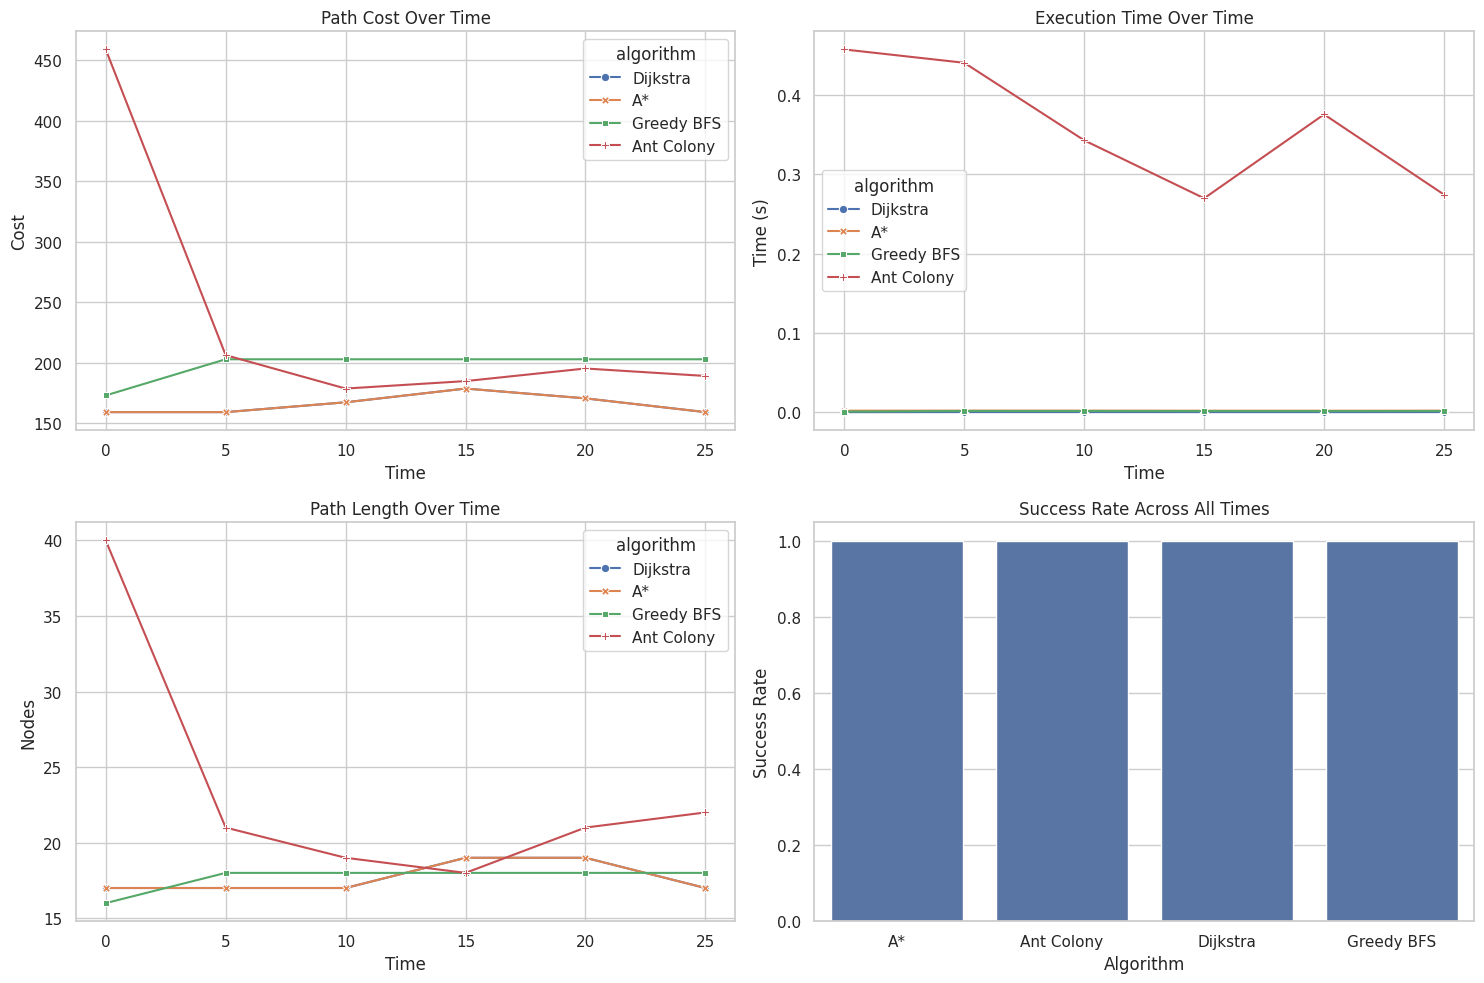

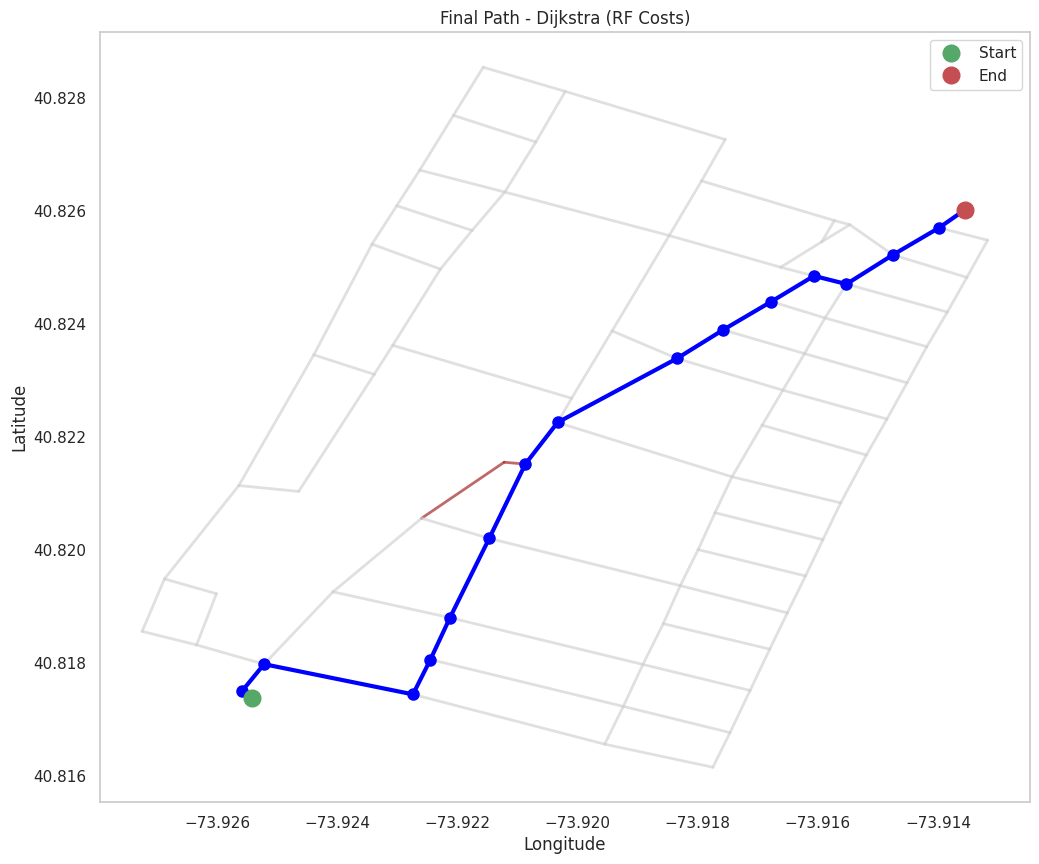

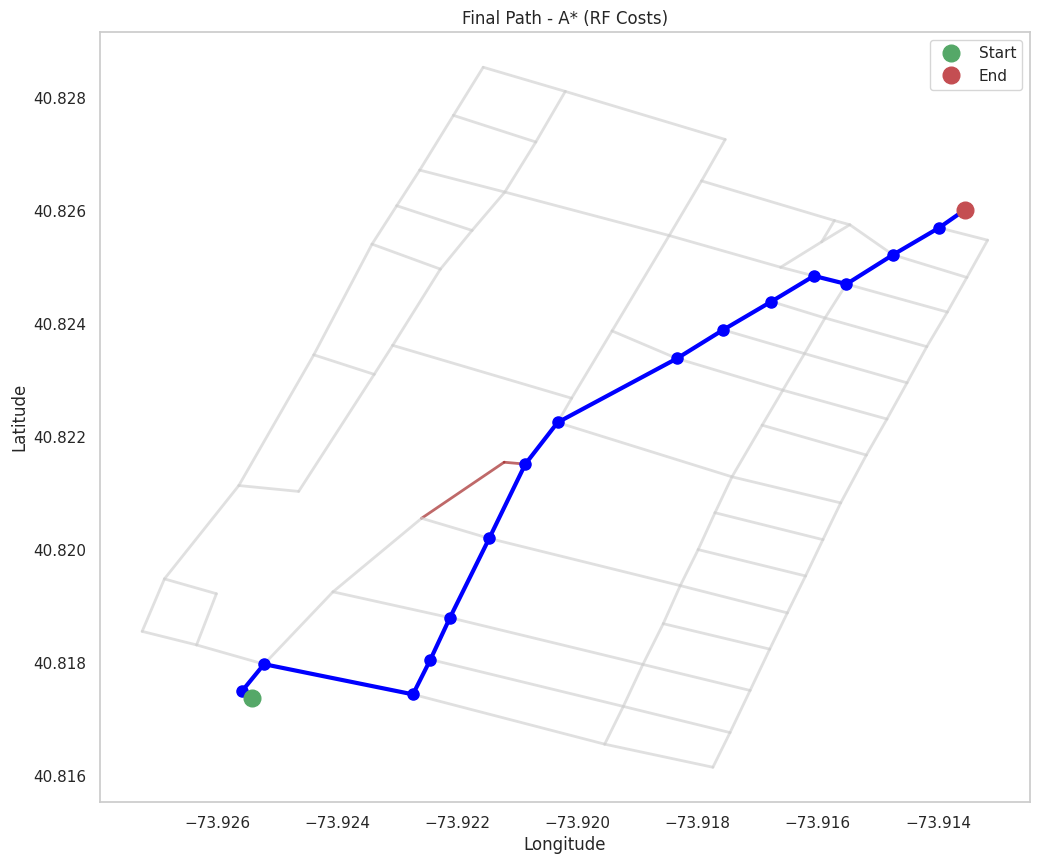

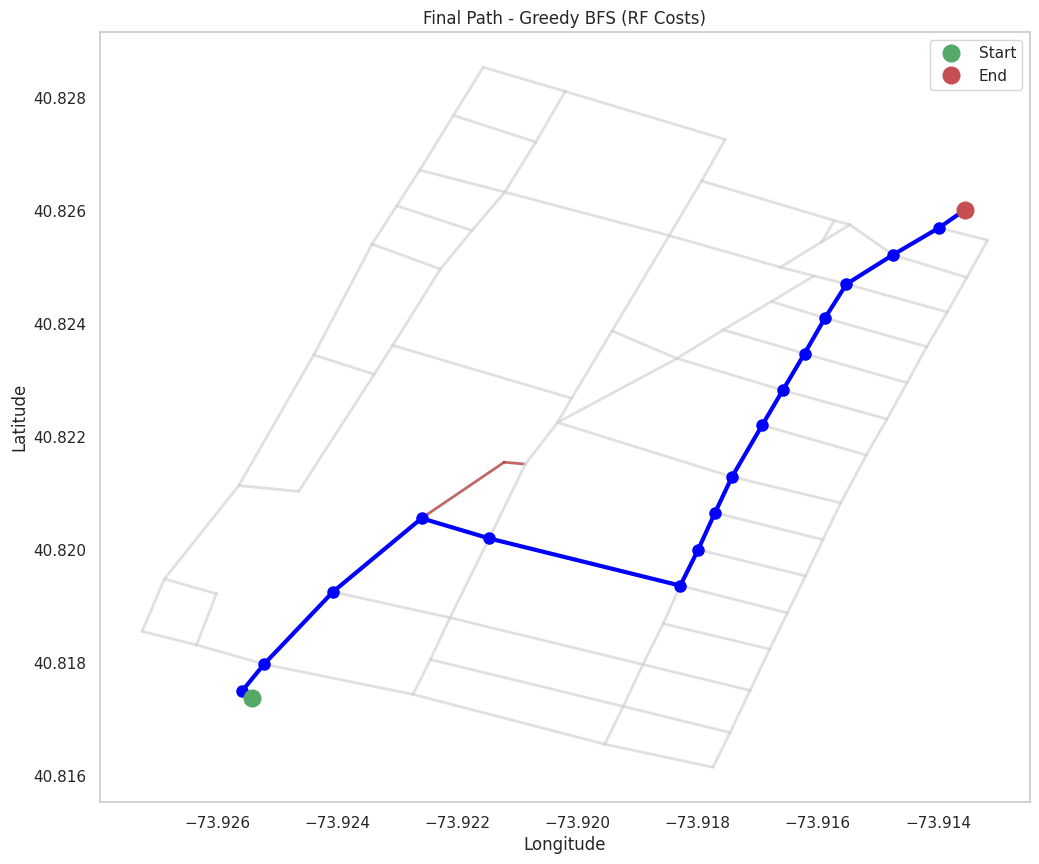

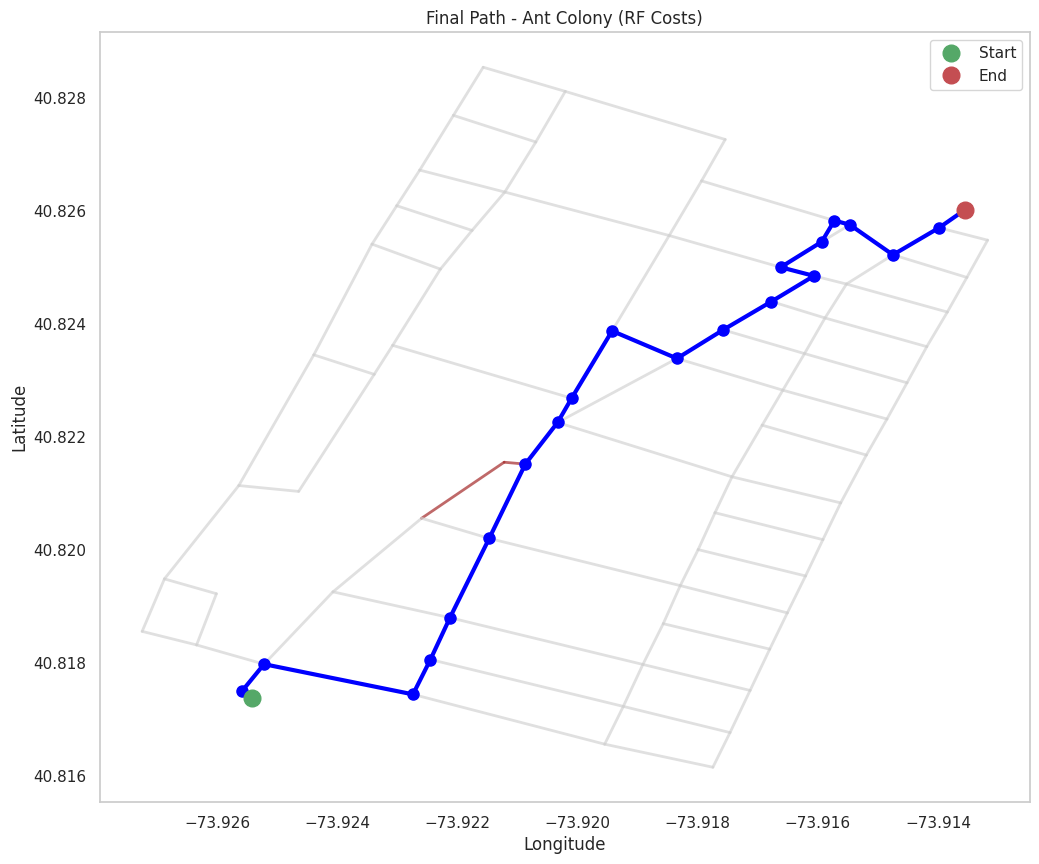

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import time
import heapq
import numpy as np
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ====================== Data Loading and Preparation ======================
def load_and_prepare_data(filepath):
    """Load and prepare the dataset"""
    df = pd.read_csv(filepath)
    df = df.drop(columns=['paths', 'route'])

    # Feature engineering for Random Forest
    df['is_signed'] = df['is_signed'].map({'emergency': 0, 'oneway': 1, 'twoway': 2})

    # Extract coordinates
    def extract_coords(coord_str):
        lat, lon = coord_str.strip('()').split(',')
        return float(lat), float(lon)

    df['start_lat'], df['start_lon'] = zip(*df['start_node'].apply(extract_coords))
    df['end_lat'], df['end_lon'] = zip(*df['end_node'].apply(extract_coords))

    # Prepare features for Random Forest
    X = df[['speed_limit_kph', 'distance_meters', 'is_signed', 'is_blocked',
            'start_lat', 'start_lon', 'end_lat', 'end_lon']]
    y = df['duration_seconds']

    # Train Random Forest model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Evaluate model
    y_pred = rf_model.predict(X_test)
    print("\nRandom Forest Evaluation Metrics:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"R2: {r2_score(y_test, y_pred):.2f}")

    # Use model predictions as cost
    df['cost'] = rf_model.predict(X)

    return df

# ====================== Graph Construction ======================
def build_graph(df):
    """Build the graph from the dataframe using predicted costs"""
    G = nx.DiGraph() if 'oneway' in df.columns else nx.Graph()

    for _, row in df.iterrows():
        G.add_edge(
            row['start_node'],
            row['end_node'],
            weight=row['cost'],  # Using Random Forest predicted cost
            distance=row['distance_meters'],
            duration=row['duration_seconds'],
            is_blocked=bool(row['is_blocked']),
            speed_limit=row['speed_limit_kph'],
            original_weight=row['cost']  # Store original weight
        )
    return G

# ====================== Optimized Pathfinding Algorithms ======================
def heuristic(u, v):
    """Optimized Euclidean distance heuristic with coordinate caching"""
    if not hasattr(heuristic, 'coord_cache'):
        heuristic.coord_cache = {}

    if u not in heuristic.coord_cache:
        u_coords = eval(u)
        heuristic.coord_cache[u] = (u_coords[0], u_coords[1])
    if v not in heuristic.coord_cache:
        v_coords = eval(v)
        heuristic.coord_cache[v] = (v_coords[0], v_coords[1])

    u_lat, u_lon = heuristic.coord_cache[u]
    v_lat, v_lon = heuristic.coord_cache[v]
    return sqrt((u_lat-v_lat)**2 + (u_lon-v_lon)**2)

def run_dijkstra(G, start, end):
    """Optimized Dijkstra's algorithm with priority queue and early termination"""
    start_time = time.time()

    # Check for trivial cases
    if start == end:
        return [start], 0, time.time() - start_time
    if start not in G or end not in G:
        return None, float('inf'), time.time() - start_time

    try:
        # Priority queue using heapq
        heap = []
        heapq.heappush(heap, (0, start))

        # Tracking dictionaries
        distances = {node: float('inf') for node in G.nodes}
        distances[start] = 0
        previous = {}
        visited = set()

        while heap:
            current_dist, current_node = heapq.heappop(heap)

            # Early termination if we've reached the target
            if current_node == end:
                break

            if current_node in visited:
                continue

            visited.add(current_node)

            # Explore neighbors
            for neighbor, edge_data in G[current_node].items():
                if edge_data.get('is_blocked', False):
                    continue

                edge_weight = edge_data['weight']
                distance = current_dist + edge_weight

                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    previous[neighbor] = current_node
                    heapq.heappush(heap, (distance, neighbor))

        # Reconstruct path if found
        if end in previous or start == end:
            path = []
            node = end
            while node in previous:
                path.append(node)
                node = previous[node]
            path.append(start)
            path.reverse()
            cost = distances[end]
            exec_time = time.time() - start_time
            return path, cost, exec_time
        else:
            return None, float('inf'), time.time() - start_time

    except Exception as e:
        print(f"Dijkstra's error: {e}")
        return None, float('inf'), time.time() - start_time

def run_astar(G, start, end):
    """Optimized A* algorithm with priority queue and heuristic caching"""
    start_time = time.time()

    # Check for trivial cases
    if start == end:
        return [start], 0, time.time() - start_time
    if start not in G or end not in G:
        return None, float('inf'), time.time() - start_time

    try:
        # Precompute heuristic for all nodes if graph isn't too large
        heuristic_cache = {}
        if len(G.nodes) < 10000:  # Only cache if graph is reasonably sized
            end_coords = eval(end)
            for node in G.nodes:
                node_coords = eval(node)
                heuristic_cache[node] = sqrt((node_coords[0]-end_coords[0])**2 +
                                       (node_coords[1]-end_coords[1])**2)

        # Priority queue: (f_score, g_score, node)
        heap = []
        initial_h = heuristic_cache.get(start, heuristic(start, end))
        heapq.heappush(heap, (initial_h, 0, start))

        # Tracking dictionaries
        g_scores = {node: float('inf') for node in G.nodes}
        g_scores[start] = 0
        f_scores = {node: float('inf') for node in G.nodes}
        f_scores[start] = initial_h
        came_from = {}
        visited = set()

        while heap:
            current_f, current_g, current_node = heapq.heappop(heap)

            # Early termination
            if current_node == end:
                break

            if current_node in visited:
                continue

            visited.add(current_node)

            # Explore neighbors
            for neighbor, edge_data in G[current_node].items():
                if edge_data.get('is_blocked', False):
                    continue

                # Calculate tentative g_score
                edge_weight = edge_data['weight']
                tentative_g = current_g + edge_weight

                if tentative_g < g_scores[neighbor]:
                    came_from[neighbor] = current_node
                    g_scores[neighbor] = tentative_g
                    # Use cached heuristic if available
                    h_score = heuristic_cache.get(neighbor, heuristic(neighbor, end))
                    f_scores[neighbor] = tentative_g + h_score
                    heapq.heappush(heap, (f_scores[neighbor], tentative_g, neighbor))

        # Reconstruct path if found
        if end in came_from or start == end:
            path = []
            node = end
            while node in came_from:
                path.append(node)
                node = came_from[node]
            path.append(start)
            path.reverse()
            cost = g_scores[end]
            exec_time = time.time() - start_time
            return path, cost, exec_time
        else:
            return None, float('inf'), time.time() - start_time

    except Exception as e:
        print(f"A* error: {e}")
        return None, float('inf'), time.time() - start_time

def run_greedy_bfs(G, start, end):
    """Optimized Greedy BFS with priority queue and heuristic caching"""
    start_time = time.time()

    # Check for trivial cases
    if start == end:
        return [start], 0, time.time() - start_time
    if start not in G or end not in G:
        return None, float('inf'), time.time() - start_time

    try:
        # Precompute heuristic for all nodes if graph isn't too large
        heuristic_cache = {}
        if len(G.nodes) < 10000:  # Only cache if graph is reasonably sized
            end_coords = eval(end)
            for node in G.nodes:
                node_coords = eval(node)
                heuristic_cache[node] = sqrt((node_coords[0]-end_coords[0])**2 +
                                       (node_coords[1]-end_coords[1])**2)

        # Priority queue: (heuristic, node)
        heap = []
        initial_h = heuristic_cache.get(start, heuristic(start, end))
        heapq.heappush(heap, (initial_h, start))

        came_from = {}
        visited = set()
        found = False

        while heap:
            current_h, current_node = heapq.heappop(heap)

            # Early termination
            if current_node == end:
                found = True
                break

            if current_node in visited:
                continue

            visited.add(current_node)

            # Explore neighbors
            for neighbor, edge_data in G[current_node].items():
                if edge_data.get('is_blocked', False):
                    continue

                if neighbor not in visited:
                    # Use cached heuristic if available
                    h_score = heuristic_cache.get(neighbor, heuristic(neighbor, end))
                    heapq.heappush(heap, (h_score, neighbor))
                    came_from[neighbor] = current_node

        # Reconstruct path if found
        if found:
            path = []
            node = end
            while node in came_from:
                path.append(node)
                node = came_from[node]
            path.append(start)
            path.reverse()
            # Calculate actual cost of path (not heuristic)
            cost = sum(G[u][v]['weight'] for u, v in zip(path[:-1], path[1:]))
            exec_time = time.time() - start_time
            return path, cost, exec_time
        else:
            return None, float('inf'), time.time() - start_time

    except Exception as e:
        print(f"Greedy BFS error: {e}")
        return None, float('inf'), time.time() - start_time

class OptimizedAntColony:
    """Optimized Ant Colony Optimization with multiple performance improvements"""

    def __init__(self, graph, n_ants=15, n_iterations=100, decay=0.5, alpha=1, beta=3,
                 elitist_factor=2, stagnation_limit=15, parallel_ants=False):
        """
        Initialize the optimized ACO algorithm

        Parameters:
        - graph: NetworkX graph
        - n_ants: Number of ants per iteration
        - n_iterations: Maximum number of iterations
        - decay: Pheromone decay rate (0-1)
        - alpha: Importance of pheromone (≥0)
        - beta: Importance of heuristic (≥0)
        - elitist_factor: Extra pheromone for best path
        - stagnation_limit: Stop if no improvement after this many iterations
        - parallel_ants: Whether to simulate parallel ant exploration (conceptual)
        """
        # Create a temporary graph without blocked edges
        self.graph = nx.DiGraph() if isinstance(graph, nx.DiGraph) else nx.Graph()
        for u, v, d in graph.edges(data=True):
            if not d.get('is_blocked', False):
                self.graph.add_edge(u, v, weight=max(0.1, d['weight']))  # Ensure positive weight

        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.elitist_factor = elitist_factor
        self.stagnation_limit = stagnation_limit
        self.parallel_ants = parallel_ants

        # Initialize pheromones inversely proportional to edge weights
        self.pheromone = {}
        self.heuristic_cache = {}
        for u, v, d in self.graph.edges(data=True):
            self.pheromone[(u, v)] = 1 / max(0.1, d['weight'])
            self.heuristic_cache[(u, v)] = (1 / max(0.0001, d['weight'])) ** self.beta
            if not isinstance(self.graph, nx.DiGraph):
                self.pheromone[(v, u)] = self.pheromone[(u, v)]
                self.heuristic_cache[(v, u)] = self.heuristic_cache[(u, v)]

        # Initialize best path tracking
        self.best_path = None
        self.best_cost = float('inf')
        self.stagnation_count = 0
        self.iteration_stats = []

    def run(self, start, end):
        """Run the optimized ACO algorithm"""
        start_time = time.time()

        for iteration in range(self.n_iterations):
            # Generate solutions from all ants
            if self.parallel_ants:
                paths, costs = self._parallel_ant_exploration(start, end)
            else:
                paths, costs = self._sequential_ant_exploration(start, end)

            # Update best solution
            self._update_best_solution(paths, costs)

            # Early termination if stagnating
            if self.stagnation_count >= self.stagnation_limit:
                break

            # Update pheromones
            self._update_pheromones(paths, costs)

            # Adaptive parameter adjustment
            if iteration % 10 == 0:
                self._adapt_parameters(iteration)

        exec_time = time.time() - start_time
        return self.best_path, self.best_cost, exec_time

    def _parallel_ant_exploration(self, start, end):
        """Simulate parallel ant exploration (conceptual optimization)"""
        paths = []
        costs = []

        # Generate paths for all ants (conceptually parallel)
        for _ in range(self.n_ants):
            path = self._construct_path(start, end)
            if path and path[-1] == end:
                cost = sum(self.graph[u][v]['weight'] for u, v in zip(path[:-1], path[1:]))
                paths.append(path)
                costs.append(cost)

        return paths, costs

    def _sequential_ant_exploration(self, start, end):
        """Traditional sequential ant exploration"""
        return self._parallel_ant_exploration(start, end)  # Same implementation for now

    def _construct_path(self, start, end):
        """Construct a path for a single ant with optimized probability calculation"""
        path = [start]
        current = start
        visited = set([start])

        while current != end:
            neighbors = list(self.graph.neighbors(current))
            unvisited = [n for n in neighbors if n not in visited]

            if not unvisited:
                return None  # Dead end

            # Calculate probabilities using cached values
            probs = np.zeros(len(unvisited))
            total = 0.0

            for i, neighbor in enumerate(unvisited):
                edge = (current, neighbor)
                pheromone = self.pheromone.get(edge, 1e-10) ** self.alpha
                heuristic = self.heuristic_cache.get(edge, 1e-10)
                probs[i] = pheromone * heuristic
                total += probs[i]

            # Normalize probabilities
            if total <= 0:
                probs = np.ones(len(unvisited)) / len(unvisited)
            else:
                probs /= total

            # Choose next node using numpy's optimized random choice
            next_node = unvisited[np.random.choice(len(unvisited), p=probs)]
            path.append(next_node)
            visited.add(next_node)
            current = next_node

        return path

    def _update_best_solution(self, paths, costs):
        """Update the best found solution"""
        if costs and min(costs) < self.best_cost:
            idx = np.argmin(costs)
            self.best_path = paths[idx]
            self.best_cost = costs[idx]
            self.stagnation_count = 0
        else:
            self.stagnation_count += 1

    def _update_pheromones(self, paths, costs):
        """Update pheromone trails with elitist strategy"""
        # Evaporate all pheromones
        for edge in self.pheromone:
            self.pheromone[edge] *= self.decay

        # Deposit pheromones from all ants
        for path, cost in zip(paths, costs):
            deposit = 1 / max(0.1, cost)
            for u, v in zip(path[:-1], path[1:]):
                self.pheromone[(u, v)] += deposit
                if not isinstance(self.graph, nx.DiGraph):
                    self.pheromone[(v, u)] += deposit

        # Elitist strategy - reinforce best path
        if self.best_path and self.best_cost < float('inf'):
            elite_deposit = self.elitist_factor / max(0.1, self.best_cost)
            for u, v in zip(self.best_path[:-1], self.best_path[1:]):
                self.pheromone[(u, v)] += elite_deposit
                if not isinstance(self.graph, nx.DiGraph):
                    self.pheromone[(v, u)] += elite_deposit

    def _adapt_parameters(self, iteration):
        """Adaptively adjust parameters based on performance"""
        # Gradually shift from exploration to exploitation
        progress = iteration / self.n_iterations
        self.alpha = min(2.0, 1.0 + progress)  # Increase pheromone importance
        self.beta = max(1.0, 3.0 - progress)   # Decrease heuristic importance

        # Adjust decay rate based on solution diversity
        if self.stagnation_count > self.stagnation_limit / 2:
            self.decay = max(0.3, self.decay * 0.95)  # More exploration
        else:
            self.decay = min(0.9, self.decay * 1.05)  # More exploitation

# ====================== Event Simulation ======================
class Event:
    """Event class for discrete event simulation"""
    def __init__(self, time, event_type, data=None):
        self.time = time
        self.event_type = event_type
        self.data = data

    def __lt__(self, other):
        return self.time < other.time

def handle_event(event, graph):
    """Handle events that modify the graph"""
    if event.event_type == "block":
        for u, v in event.data["edges"]:
            if graph.has_edge(u, v):
                # Mark edge as blocked
                graph[u][v]['is_blocked'] = True
                # Store original weight if not already stored
                if 'original_weight' not in graph[u][v]:
                    graph[u][v]['original_weight'] = graph[u][v]['weight']
                # Set weight to infinity to make it impassable
                graph[u][v]['weight'] = float('inf')

    elif event.event_type == "unblock":
        for u, v in event.data["edges"]:
            if graph.has_edge(u, v):
                # Unblock the edge
                graph[u][v]['is_blocked'] = False
                # Restore original weight if available
                if 'original_weight' in graph[u][v]:
                    graph[u][v]['weight'] = graph[u][v]['original_weight']

def run_simulation(graph, events, start_node, end_node, max_time=100):
    """Run the discrete event simulation with all algorithms"""
    current_time = 0
    heapq.heapify(events)

    # Initialize results storage
    results = []

    # Initial state
    initial_blocked = [(u, v) for u, v, d in graph.edges(data=True) if d.get('is_blocked', False)]
    print(f"\nInitial state at time {current_time}:")
    print(f"Blocked edges: {initial_blocked}")

    # Run initial pathfinding with all algorithms
    initial_results = evaluate_algorithms(graph, start_node, end_node, current_time)
    results.extend(initial_results)

    # Event loop
    while events and current_time <= max_time:
        event = heapq.heappop(events)
        current_time = event.time

        print(f"\nTime {current_time}: Handling {event.event_type} event on edges {event.data['edges']}")
        handle_event(event, graph)

        # Get current blocked edges
        blocked_edges = [(u, v) for u, v, d in graph.edges(data=True) if d.get('is_blocked', False)]
        print(f"Current blocked edges: {blocked_edges}")

        # Evaluate all algorithms after event
        event_results = evaluate_algorithms(graph, start_node, end_node, current_time)
        results.extend(event_results)

    return pd.DataFrame(results)

def evaluate_algorithms(graph, start, end, current_time):
    """Evaluate all pathfinding algorithms at a given time"""
    algorithms = {
        'Dijkstra': run_dijkstra,
        'A*': run_astar,
        'Greedy BFS': run_greedy_bfs,
        'Ant Colony': lambda G, s, e: OptimizedAntColony(G).run(s, e)
    }

    results = []

    for name, algorithm in algorithms.items():
        path, cost, exec_time = algorithm(graph, start, end)

        result = {
            'time': current_time,
            'algorithm': name,
            'path_length': len(path) if path else 0,
            'cost': cost,
            'execution_time': exec_time,
            'path_found': path is not None
        }
        results.append(result)

        status = "SUCCESS" if path else "FAILED"
        print(f"{name}: {status} | Cost: {cost:.2f} | Time: {exec_time:.4f}s | Nodes: {len(path) if path else 0}")

    return results

# ====================== Visualization ======================
def plot_metrics(results_df):
    """Plot performance metrics over time"""
    plt.figure(figsize=(15, 10))

    # Cost comparison
    plt.subplot(2, 2, 1)
    sns.lineplot(data=results_df, x='time', y='cost', hue='algorithm', style='algorithm',
                 markers=True, dashes=False)
    plt.title('Path Cost Over Time')
    plt.ylabel('Cost')
    plt.xlabel('Time')

    # Execution time comparison
    plt.subplot(2, 2, 2)
    sns.lineplot(data=results_df, x='time', y='execution_time', hue='algorithm', style='algorithm',
                 markers=True, dashes=False)
    plt.title('Execution Time Over Time')
    plt.ylabel('Time (s)')
    plt.xlabel('Time')

    # Path length comparison
    plt.subplot(2, 2, 3)
    sns.lineplot(data=results_df, x='time', y='path_length', hue='algorithm', style='algorithm',
                 markers=True, dashes=False)
    plt.title('Path Length Over Time')
    plt.ylabel('Nodes')
    plt.xlabel('Time')

    # Success rate
    plt.subplot(2, 2, 4)
    success_rates = results_df.groupby('algorithm')['path_found'].mean().reset_index()
    sns.barplot(data=success_rates, x='algorithm', y='path_found')
    plt.title('Success Rate Across All Times')
    plt.ylabel('Success Rate')
    plt.xlabel('Algorithm')

    plt.tight_layout()
    plt.show()

def plot_path(path, title, graph):
    """Visualize a path on the graph with blocked edges highlighted"""
    if not path:
        print(f"No path to visualize for {title}")
        return

    coords = [eval(node) for node in path]
    plt.figure(figsize=(12, 10))

    # Plot all edges first
    for u, v, d in graph.edges(data=True):
        u_coords = eval(u)
        v_coords = eval(v)
        color = 'brown' if d.get('is_blocked', False) else 'lightgray'
        plt.plot([u_coords[1], v_coords[1]], [u_coords[0], v_coords[0]], color=color, alpha=0.7, linewidth=2)

    # Plot the path on top
    path_coords = [eval(node) for node in path]
    plt.plot([c[1] for c in path_coords], [c[0] for c in path_coords], 'o-', color='blue', linewidth=3, markersize=8)

    # Add start and end markers
    start_coords = eval(path[0])
    end_coords = eval(path[-1])
    plt.plot(start_coords[1], start_coords[0], 'go', markersize=12, label='Start')
    plt.plot(end_coords[1], end_coords[0], 'ro', markersize=12, label='End')

    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.grid()
    plt.show()

# The pathfinding algorithms, event simulation, and visualization functions
# don't need to change since they already work with the 'weight' attribute

def main():
    # Load and prepare data with Random Forest predictions
    df = load_and_prepare_data("Updated_Speed_Limits_with_Duration.csv")

    # Build graph with predicted costs
    G = build_graph(df)

    # Define start and end nodes
    start_node = "(40.817387, -73.925413)"
    end_node = "(40.826014, -73.913553)"

    # Create event queue
    event_queue = [
        Event(5, "block", {"edges": [
            ("(40.820560, -73.922594)", "(40.821551, -73.921220)"),
            ("(40.821551, -73.921220)", "(40.821518, -73.920868)")
        ]}),
        Event(10, "block", {"edges": [("(40.823892, -73.917575)", "(40.824393, -73.916772)")]}),
        Event(15, "block", {"edges": [("(40.822254, -73.920331)", "(40.823386, -73.918344)")]}),
        Event(20, "unblock", {"edges": [("(40.823892, -73.917575)", "(40.824393, -73.916772)")]}),
        Event(25, "unblock", {"edges": [("(40.822254, -73.920331)", "(40.823386, -73.918344)")]})
    ]

    # Run simulation
    print("Starting simulation with dynamic events and Random Forest predicted costs...")
    results_df = run_simulation(G, event_queue, start_node, end_node, max_time=30)

    # Plot metrics
    plot_metrics(results_df)

    # Show final paths from each algorithm
    final_time = results_df['time'].max()
    final_results = results_df[results_df['time'] == final_time]

    for _, row in final_results.iterrows():
        if row['path_found']:
            # Get the actual path found by the algorithm (simplified for demo)
            if row['algorithm'] == 'Dijkstra':
                path, _, _ = run_dijkstra(G, start_node, end_node)
            elif row['algorithm'] == 'A*':
                path, _, _ = run_astar(G, start_node, end_node)
            elif row['algorithm'] == 'Greedy BFS':
                path, _, _ = run_greedy_bfs(G, start_node, end_node)
            elif row['algorithm'] == 'Ant Colony':
                path, _, _ = OptimizedAntColony(G).run(start_node, end_node)
            else:
                path = None
                print(f"No path found for {row['algorithm']}")

            if path:
                plot_path(path, f"Final Path - {row['algorithm']} (RF Costs)", G)

if __name__ == "__main__":
    main()